<a href="https://colab.research.google.com/github/hridaykharpude/stock-market-prediction/blob/main/stock-market-prediction-final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use ('fivethirtyeight')

import time
import datetime
import pandas as pd

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError


from tensorflow.keras.optimizers import Adam

# Defining Callable Functions


In [ ]:
def get_data(ticker, starttime, endtime, interval):
  query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={starttime}&period2={endtime}&interval={interval}&events=history&includeAdjustedClose=true'
  df = pd.read_csv(query_string)
  return df

In [ ]:
def training_prep_data(df):
  df.drop(df.columns[0], axis=1)

  col1 = df["High"]
  col2 = df["Low"]
  col3 = df["Open"]
  col4 = df["Close"]
  col5 = df["Volume"]
  col6 = df["Adj Close"]

  df = pd.DataFrame(col1)
  df["Low"] = col2
  df["Open"] = col3
  df["Close"] = col4
  df["Volume"] = col5
  df["Adj Close"] = col6

  df.reset_index(drop=True, inplace=True)
  df.fillna(df.mean(), inplace=True)

  df.isnull().sum()
  
  return df

In [ ]:
def split_data(df):
  data = df.filter(['Close'])
  dataset = data.values #Converts to a numpy array
  training_data_len = math.ceil(len(dataset)*.8) 
  
  global scaler
  scaler = MinMaxScaler(feature_range=(0,1)) 
  scaled_data = scaler.fit_transform(dataset)

  #Seperating training data
  train_data = scaled_data[0:training_data_len , :]
  
  x_train = [] 
  y_train = [] #Splitting the data into x_train and y_train data sets
  
  for i in range (60, len (train_data)) :
    x_train.append(train_data [i-60:i, 0])
    y_train.append(train_data [i, 0]) 
    #if i <= 60:
      #print(x_train) 
      #print(y_train) 
      #print()

  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


  #Seperating testing data
  test_data = scaled_data[training_data_len - 60: , :]
  
  x_test = [] 
  y_test = dataset[training_data_len:, :]

  for i in range(60, len(test_data)) :
    x_test.append(test_data[i-60:i, 0])
  
  x_test = np.array(x_test)
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

  return x_train, y_train, x_test

In [ ]:
"""def create_model(shape):
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape= (shape, 1)))
  model.add(LSTM(50, return_sequences= False))
  model.add(Dense(25))
  model.add(Dense(1))

  #model.compile(optimizer='adam', loss='mean_squared_error') #Implementing regression metrics can improve accuracy

  adam = Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) 

  #model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
  model.compile(optimizer=adam, loss='mse', metrics=['mse', 'mae'])
  return model"""

"def create_model(shape):\n  model = Sequential()\n  model.add(LSTM(50, return_sequences=True, input_shape= (shape, 1)))\n  model.add(LSTM(50, return_sequences= False))\n  model.add(Dense(25))\n  model.add(Dense(1))\n\n  #model.compile(optimizer='adam', loss='mean_squared_error') #Implementing regression metrics can improve accuracy\n\n  adam = Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) \n\n  #model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])\n  model.compile(optimizer=adam, loss='mse', metrics=['mse', 'mae'])\n  return model"

In [ ]:
def create_normal_model(shape):
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape= (shape, 1)))
  model.add(LSTM(50, return_sequences= False))
  model.add(Dense(25))
  model.add(Dense(1))

  #model.compile(optimizer='adam', loss='mean_squared_error') #Implementing regression metrics can improve accuracy

  #adam = Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) 

  model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
  #model.compile(optimizer=adam, loss='mse', metrics=['mse', 'mae'])
  return model

In [ ]:
def create_optimizer_model(shape):
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape= (shape, 1)))
  model.add(LSTM(50, return_sequences= False))
  model.add(Dense(25))
  model.add(Dense(1))

  #model.compile(optimizer='adam', loss='mean_squared_error') #Implementing regression metrics can improve accuracy

  adam = Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) 

  #model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
  model.compile(optimizer=adam, loss='mse', metrics=['mse', 'mae'])
  return model

In [ ]:
def train_model(model, x_train, y_train):
  model.fit(x_train, y_train, batch_size=1, epochs=5)
  return model

In [ ]:
def model_predict(model, pred_data):
  predictions = model.predict(pred_data)

  #scaler = MinMaxScaler(feature_range=(0,1)) 
  #scaled_data = scaler.fit_transform(dataset)
  
  predictions = scaler.inverse_transform(predictions)

  return predictions

# Main Code

In [ ]:
#Getting Data
#stock_name = 'LT.NSHello there bro paragraph Ka Vasta Vandanam Daawat Daawat call Anibha the asshole Daawat Saanga Gaana Hai 66.58Hello there bro paragraph Ka Vasta Vandanam Daawat Daawat call Anibha the asshole Daawat Saanga Gaana Hai 66.58 Altena L&T Ella LTE multiple of food is the governor Daawat L&T guilty TLTLTLT Vishakha Kutty'
stock_name = "TATACHEM.NS"
start_time = int(time.mktime(datetime.datetime(2000, 1, 1, 23, 59).timetuple()))
end_time = int(time.mktime(datetime.datetime(2022, 4, 12, 23, 59).timetuple()))
interval = '1d' 

df = get_data(stock_name, start_time, end_time, interval)
df = training_prep_data(df)
df

,High,Low,Open,Close,Volume,Adj Close
0,62.900002,59.150002,62.000000,62.400002,264785.0,23.058159
1,63.150002,60.099998,62.000000,60.549999,188555.0,22.374537
2,60.500000,57.500000,57.500000,58.200001,305858.0,21.506166
3,62.000000,58.299999,59.750000,60.000000,442750.0,22.171297
4,61.000000,58.599998,60.000000,59.349998,218315.0,21.931110
...,...,...,...,...,...,...
5571,1017.549988,996.049988,1000.000000,1000.549988,1205753.0,972.649536
5572,1010.000000,978.000000,1001.500000,981.000000,692829.0,953.644714
5573,1005.000000,982.000000,982.000000,999.599976,676739.0,971.726013
5574,1021.799988,996.200012,997.900024,1006.650024,1178976.0,978.579468


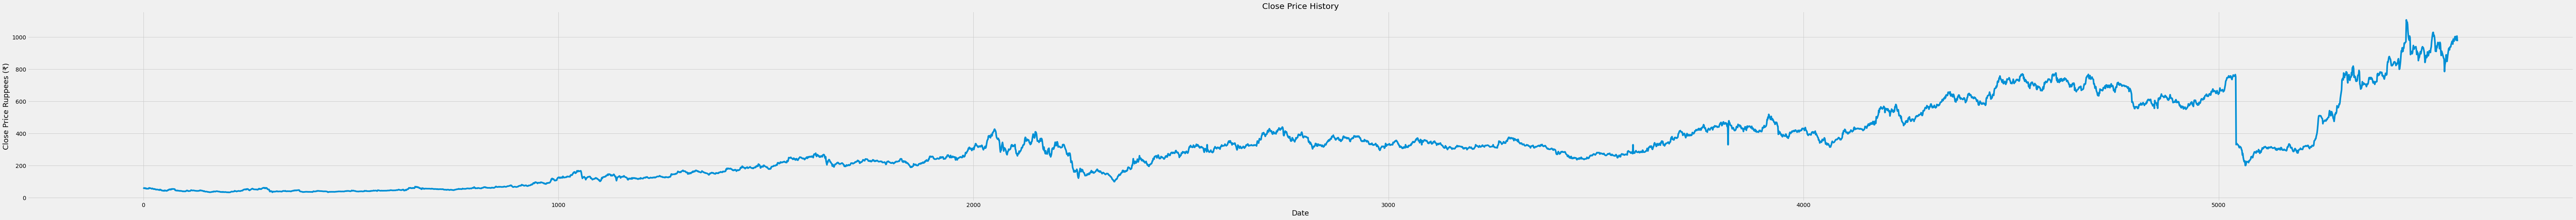

In [ ]:
plt.figure(figsize=(100,8)) 
plt.title('Close Price History') 
plt.plot(df['Close']) 
plt.ylabel('Close Price Ruppees (₹)', fontsize=18)
plt.xlabel('Date', fontsize=18)

plt.show()

In [ ]:
X_train, Y_train, X_test = split_data(df)

In [ ]:
shape = X_train.shape[1]

model1 = create_normal_model(shape)
model1 = train_model(model1, X_train, Y_train)

Epoch 1/5
4401/4401 [==============================] - 31s 6ms/step - loss: 3.4834e-04 - mse: 3.4834e-04 - mae: 0.0127
Epoch 2/5
4401/4401 [==============================] - 28s 6ms/step - loss: 1.4669e-04 - mse: 1.4669e-04 - mae: 0.0087
Epoch 3/5
4401/4401 [==============================] - 28s 6ms/step - loss: 1.1625e-04 - mse: 1.1625e-04 - mae: 0.0078
Epoch 4/5
4401/4401 [==============================] - 29s 7ms/step - loss: 1.0518e-04 - mse: 1.0518e-04 - mae: 0.0074
Epoch 5/5
4401/4401 [==============================] - 28s 6ms/step - loss: 9.6197e-05 - mse: 9.6197e-05 - mae: 0.0070


In [ ]:

predictions1 = model_predict(model1, X_test)
predictions1

array([[678.6196 ],
       [679.6737 ],
       [678.98834],
       ...,
       [956.19684],
       [974.9041 ],
       [982.8739 ]], dtype=float32)

In [ ]:
shape = X_train.shape[1]

model2 = create_optimizer_model(shape)
model2 = train_model(model2, X_train, Y_train)

Epoch 1/5
4401/4401 [==============================] - 31s 7ms/step - loss: 3.9850e-04 - mse: 3.9850e-04 - mae: 0.0122
Epoch 2/5
4401/4401 [==============================] - 29s 7ms/step - loss: 1.5083e-04 - mse: 1.5083e-04 - mae: 0.0088
Epoch 3/5
4401/4401 [==============================] - 28s 6ms/step - loss: 9.6658e-05 - mse: 9.6658e-05 - mae: 0.0071
Epoch 4/5
4401/4401 [==============================] - 28s 6ms/step - loss: 8.3015e-05 - mse: 8.3015e-05 - mae: 0.0063
Epoch 5/5
4401/4401 [==============================] - 28s 6ms/step - loss: 7.2590e-05 - mse: 7.2590e-05 - mae: 0.0059


In [ ]:

predictions2 = model_predict(model2, X_test)
predictions2

array([[663.3741 ],
       [665.3978 ],
       [665.7265 ],
       ...,
       [957.3874 ],
       [978.2057 ],
       [985.66644]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


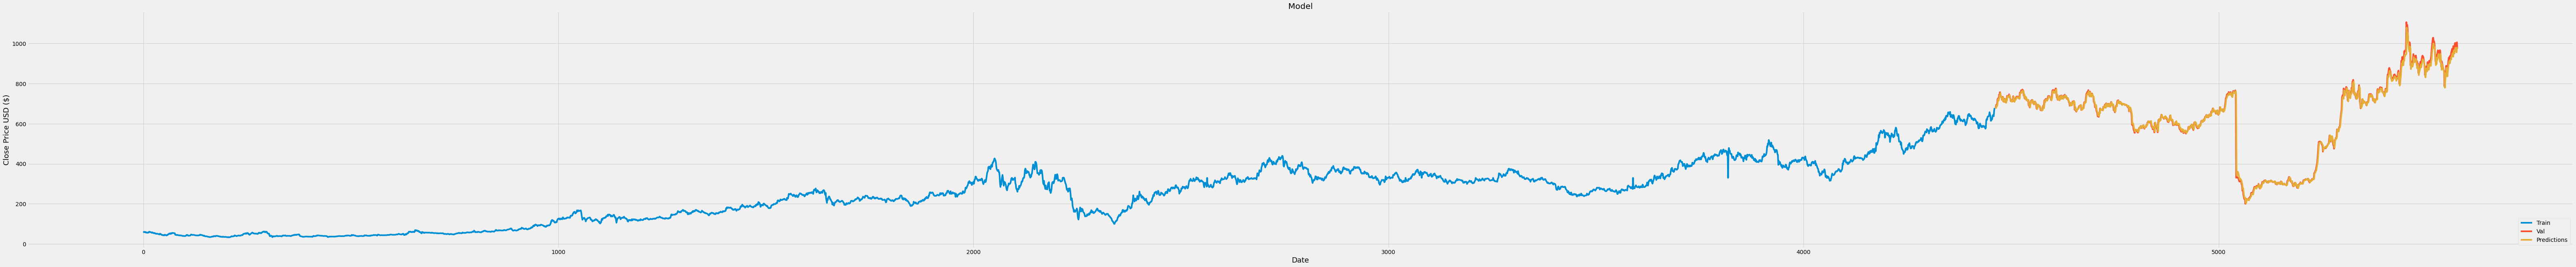

In [ ]:
data = df.filter(['Close'])
dataset = data.values #Converts to a numpy array
training_data_len = math.ceil(len(dataset)*.8)

train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions1
      
plt.figure(figsize=(100,10))
plt.title( 'Model' )
plt.xlabel ('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[ 'Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


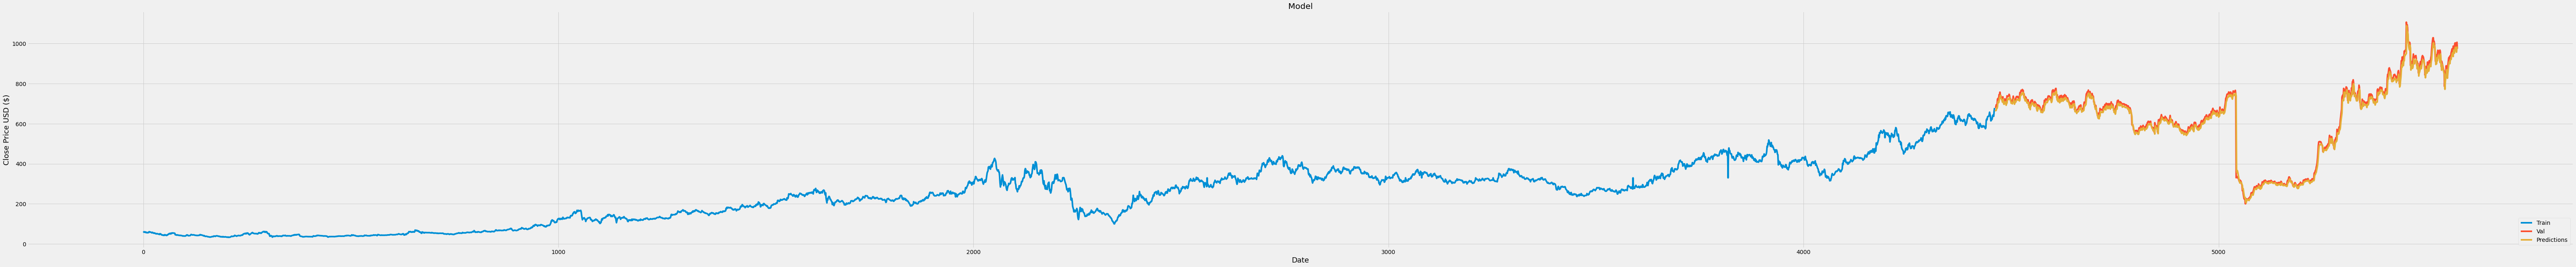

In [ ]:
data = df.filter(['Close'])
dataset = data.values #Converts to a numpy array
training_data_len = math.ceil(len(dataset)*.8)

train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions2
      
plt.figure(figsize=(100,10))
plt.title( 'Model' )
plt.xlabel ('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[ 'Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


In [ ]:
dff = get_data(stock_name, start_time, end_time, interval)
dff = training_prep_data(df)

scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_data = scaler.fit_transform(dataset)

new_df = dff.filter(['Close'])
last_60_days = new_df[-60:].values
#print(last_60_days.shape)
last_60_days_scaled = scaler.transform(last_60_days)
#print(last_60_days_scaled.shape)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price_1 = model1.predict(X_test)
pred_price_1 = scaler.inverse_transform(pred_price_1)
print("(Normal Model) Predicted Value : ",float(pred_price_1))

pred_price_2 = model2.predict(X_test)
pred_price_2 = scaler.inverse_transform(pred_price_2)
print("(Optimizer Model) Predicted Value : ",float(pred_price_2))

Normal Model 951.1322631835938
Optimizer Model 951.4004516601562


In [ ]:
"""
present_time =  int(time.mktime(datetime.datetime(2022, 2, 18, 23, 59).timetuple()))

df = get_datadff = get_data(stock_name, present_time, present_time, interval)
print(float(df['Close']))
"""

"\npresent_time =  int(time.mktime(datetime.datetime(2022, 2, 18, 23, 59).timetuple()))\n\ndf = get_datadff = get_data(stock_name, present_time, present_time, interval)\nprint(float(df['Close']))\n"